In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression  
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score 
import pandas as pd

Mounted at /content/drive


#death

In [38]:
df = pd.read_csv("/content/drive/MyDrive/weatherAUS-noWind.csv")

In [40]:
df.head()

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindSpeedNorth,WindSpeedEast,WindSpeedNorth9am,WindSpeedEast9am,WindSpeedNorth3pm,WindSpeedEast3pm
0,13.4,22.9,0.6,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,-0.0,-44.0,-0.0,-20.0,9.0,-22.0
1,7.4,25.1,0.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,17.0,-41.0,4.0,-2.0,-8.0,-20.0
2,12.9,25.7,0.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,-18.0,-42.0,-0.0,-19.0,-10.0,-24.0
3,9.2,28.0,0.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,17.0,17.0,-8.0,8.0,0.0,9.0
4,17.5,32.3,1.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,-0.0,-41.0,3.0,6.0,14.0,-14.0


In [41]:
X, y = df.loc[:, df.columns != "RainTomorrow"], df['RainTomorrow']
# X=np.array(X)
# y=np.array(y)

In [42]:
X.shape

(142141, 16)

In [43]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler()
print(sorted(Counter(y).items()))
X_resampled, y_resampled = ros.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 110269), (1, 31872)]
[(0, 110269), (1, 110269)]


In [85]:
from sklearn.decomposition import PCA

pca2=PCA(0.98)
X_pc=pca2.fit_transform(X)
X_pc.shape

print("No of components created by pca =",pca2.n_components_ )

#how much variance is captured by the components
print("Variance is captured by each component : \n", pca2.explained_variance_ratio_, "\n")
X_pc = pd.DataFrame(X_pc)

No of components created by pca = 10
Variance is captured by each component : 
 [0.31843978 0.27526178 0.19321948 0.0507638  0.03461409 0.03108995
 0.02737924 0.0194306  0.01778283 0.01708278] 



In [53]:
from sklearn.decomposition import PCA

pca=PCA(0.98)
X_pca=pca.fit_transform(X_resampled)
X_pca.shape

print("No of components created by pca =",pca.n_components_ )

#how much variance is captured by the components
print("Variance is captured by each component : \n", pca.explained_variance_ratio_, "\n")
X_pca = pd.DataFrame(X_pca)
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.DataFrame(y_resampled)

No of components created by pca = 10
Variance is captured by each component : 
 [0.32051993 0.27671621 0.18377339 0.0479644  0.03463597 0.03209473
 0.03037378 0.02313163 0.01845896 0.01669095] 



In [54]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [55]:
X_train1, X_temp, y_train1, y_temp = train_test_split(X_pca, y_resampled, test_size=0.3, random_state=0)
X_test1, X_val1, y_test1, y_val1 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [56]:
X_train2, X_temp, y_train2, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)
X_test2, X_val2, y_test2, y_val2 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [89]:
X_train0, X_temp, y_train0, y_temp = train_test_split(X_pc, y, test_size=0.3, random_state=0)
X_test0, X_val0, y_test0, y_val0 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [90]:
from sklearn.preprocessing import StandardScaler
import math
standard_scaler = StandardScaler()
standard_scaler = standard_scaler.fit(X_train0)

X_train0 = pd.DataFrame(standard_scaler.transform(X_train0))

means = standard_scaler.mean_
vars = standard_scaler.var_
print(len(X_test0.columns))
i = 0
for col in X_test0.columns:
  X_test0[col] = (X_test0[col] - means[i])/math.sqrt(vars[i])
  i+=1
print(X_test0.describe())
print(len(X_val0.columns))
i = 0
for col in X_val0.columns:
  X_val0[col] = (X_val0[col] - means[i])/math.sqrt(vars[i])
  i+=1
print(X_val0.describe())

10
                  0             1             2             3             4  \
count  21321.000000  21321.000000  21321.000000  21321.000000  21321.000000   
mean       0.006601      0.015999      0.007440     -0.000050     -0.007898   
std        0.999543      0.999034      1.004435      0.997166      0.998562   
min       -3.192443     -3.994476     -3.008634     -3.274393     -4.150666   
25%       -0.812841     -0.751526     -0.684677     -0.700613     -0.645479   
50%        0.045976      0.133859     -0.060888     -0.015853     -0.031679   
75%        0.765709      0.757299      0.645007      0.695142      0.602193   
max        3.598293      5.278723      3.689344      4.593446      5.125664   

                  5             6             7             8             9  
count  21321.000000  21321.000000  21321.000000  21321.000000  21321.000000  
mean       0.011025     -0.000485      0.001224     -0.002365      0.004437  
std        1.003229      0.999973      1.006875    

In [91]:
X_train0=np.array(X_train0)
y_train0=np.array(y_train0)
X_test0=np.array(X_test0)
y_test0=np.array(y_test0)
X_val0=np.array(X_val0)
y_val0=np.array(y_val0)

In [57]:
from sklearn.preprocessing import StandardScaler
import math
standard_scaler = StandardScaler()
standard_scaler = standard_scaler.fit(X_train)

X_train = pd.DataFrame(standard_scaler.transform(X_train))

means = standard_scaler.mean_
vars = standard_scaler.var_
print(len(X_test.columns))
i = 0
for col in X_test.columns:
  X_test[col] = (X_test[col] - means[i])/math.sqrt(vars[i])
  i+=1
print(X_test.describe())
print(len(X_val.columns))
i = 0
for col in X_val.columns:
  X_val[col] = (X_val[col] - means[i])/math.sqrt(vars[i])
  i+=1
print(X_val.describe())

16
            MinTemp       MaxTemp      Rainfall   Humidity9am   Humidity3pm  \
count  21321.000000  21321.000000  21321.000000  21321.000000  21321.000000   
mean      -0.002579      0.000094      0.002624     -0.002023     -0.001968   
std        0.996676      0.997611      1.033267      0.998012      1.004105   
min       -3.232217     -3.837772     -0.277662     -3.568072     -2.492946   
25%       -0.716922     -0.748874     -0.277662     -0.623951     -0.702402   
50%       -0.029512     -0.088973     -0.277662      0.059506      0.023495   
75%        0.720389      0.697293     -0.205906      0.742963      0.700998   
max        3.001340      3.336897     26.630626      1.636714      2.346364   

        Pressure9am   Pressure3pm       Temp9am       Temp3pm     RainToday  \
count  21321.000000  21321.000000  21321.000000  21321.000000  21321.000000   
mean       0.009019      0.007803      0.000306      0.000587     -0.005197   
std        0.993733      0.998704      0.996924 

In [58]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
X_val=np.array(X_val)
y_val=np.array(y_val)

In [60]:
from sklearn.preprocessing import StandardScaler
import math
standard_scaler = StandardScaler()
standard_scaler = standard_scaler.fit(X_train1)

X_train1 = pd.DataFrame(standard_scaler.transform(X_train1))

means = standard_scaler.mean_
vars = standard_scaler.var_
print(len(X_test1.columns))
i = 0
for col in X_test1.columns:
  X_test1[col] = (X_test1[col] - means[i])/math.sqrt(vars[i])
  i+=1
print(X_test1.describe())
print(len(X_val1.columns))
i = 0
for col in X_val1.columns:
  X_val1[col] = (X_val1[col] - means[i])/math.sqrt(vars[i])
  i+=1
print(X_val1.describe())

10
                  0             1             2             3             4  \
count  33081.000000  33081.000000  33081.000000  33081.000000  33081.000000   
mean       0.071135      0.026863     -0.185756     -0.006404     -0.008599   
std       35.193771     32.547285     26.711513     13.648732     11.551697   
min     -123.999564   -119.192408    -84.052468    -47.559488    -60.956241   
25%      -26.352267    -25.929659    -19.037016     -9.407829     -7.046771   
50%       -2.228563      4.147854     -1.846439     -0.112482     -0.592251   
75%       29.310688     24.351661     16.387269      9.121206      6.409427   
max      106.219955    147.027727    100.029298    126.309624    186.405728   

                  5             6             7             8             9  
count  33081.000000  33081.000000  33081.000000  33081.000000  33081.000000  
mean       0.021046      0.054059     -0.017539      0.005524     -0.024075  
std       11.123487     10.855945      9.529254    

In [61]:
X_train1=np.array(X_train1)
y_train1=np.array(y_train1)
X_test1=np.array(X_test1)
y_test1=np.array(y_test1)
X_val1=np.array(X_val1)
y_val1=np.array(y_val1)

In [63]:
from sklearn.preprocessing import StandardScaler
import math
standard_scaler = StandardScaler()
standard_scaler = standard_scaler.fit(X_train2)

X_train2 = pd.DataFrame(standard_scaler.transform(X_train2))

means = standard_scaler.mean_
vars = standard_scaler.var_
print(len(X_test2.columns))
i = 0
for col in X_test2.columns:
  X_test2[col] = (X_test2[col] - means[i])/math.sqrt(vars[i])
  i+=1
print(X_test2.describe())
print(len(X_val2.columns))
i = 0
for col in X_val2.columns:
  X_val2[col] = (X_val2[col] - means[i])/math.sqrt(vars[i])
  i+=1
print(X_val2.describe())

16
            MinTemp       MaxTemp      Rainfall   Humidity9am   Humidity3pm  \
count  33081.000000  33081.000000  3.308100e+04  33081.000000  33081.000000   
mean      12.543529     22.454590  3.682942e+00     72.244561     57.729190   
std        6.391667      7.115774  1.113319e+01     18.452853     21.675481   
min       -8.000000     -3.100000  1.445240e-17      1.000000      1.000000   
25%        7.900000     17.200000  1.445240e-17     61.000000     43.000000   
50%       12.200000     21.800000  1.445240e-17     74.000000     58.000000   
75%       17.200000     27.400000  2.200000e+00     87.000000     73.000000   
max       31.800000     46.900000  3.676000e+02    100.000000    100.000000   

        Pressure9am   Pressure3pm       Temp9am       Temp3pm     RainToday  \
count  33081.000000  33081.000000  33081.000000  33081.000000  3.308100e+04   
mean    1016.751678   1014.525682     16.844251     20.811793  3.068831e-01   
std        7.124502      7.095924      6.465295 

In [64]:
X_train2=np.array(X_train2)
y_train2=np.array(y_train2)
X_test2=np.array(X_test2)
y_test2=np.array(y_test2)
X_val2=np.array(X_val2)
y_val2=np.array(y_val2)

#Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_val)
print(precision_score(y_val, y_pred, average = 'micro'),'micro')
print(precision_score(y_val, y_pred, average = 'weighted'),'weghted')
print(precision_score(y_val, y_pred, average = 'macro'),'micro')

0.804333552199606 micro
0.7977947204871099 weghted
0.7193691030958733 micro


In [66]:

from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     16490
           1       0.58      0.52      0.55      4832

    accuracy                           0.80     21322
   macro avg       0.72      0.70      0.71     21322
weighted avg       0.80      0.80      0.80     21322



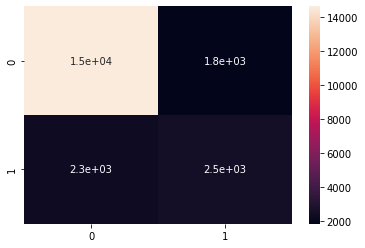

In [67]:
sns.heatmap(confusion_matrix(y_val, y_pred),annot=True)

In [68]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X_train1,y_train1)
y_pred1=gnb.predict(X_val1)
print(precision_score(y_val1, y_pred1, average = 'micro'),'micro')
print(precision_score(y_val1, y_pred1, average = 'weighted'),'weghted')
print(precision_score(y_val1, y_pred1, average = 'macro'),'micro')

0.519603397720746 micro
0.6504224031862413 weghted
0.6505029358814152 micro


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:

from sklearn.metrics import classification_report

print(classification_report(y_val1, y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.05      0.10     16531
           1       0.51      0.99      0.67     16550

    accuracy                           0.52     33081
   macro avg       0.65      0.52      0.39     33081
weighted avg       0.65      0.52      0.39     33081



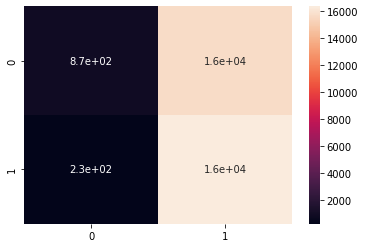

In [70]:
sns.heatmap(confusion_matrix(y_val1, y_pred1),annot=True)

In [93]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X_train2,y_train2)
y_pred2=gnb.predict(X_val2)
print(precision_score(y_val2, y_pred2, average = 'micro'),'micro')
print(precision_score(y_val2, y_pred2, average = 'weighted'),'weghted')
print(precision_score(y_val2, y_pred2, average = 'macro'),'micro')

0.8133852359065754 micro
0.7956506517865894 weghted
0.750802542964291 micro


In [72]:

from sklearn.metrics import classification_report

print(classification_report(y_val2, y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     16531
           1       0.50      1.00      0.67     16550

    accuracy                           0.50     33081
   macro avg       0.25      0.50      0.33     33081
weighted avg       0.25      0.50      0.33     33081



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


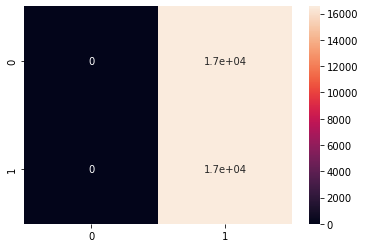

In [73]:
sns.heatmap(confusion_matrix(y_val2, y_pred2),annot=True)

In [95]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X_train0,y_train0)
y_pred0=gnb.predict(X_val0)
print(precision_score(y_val0, y_pred0, average = 'micro'),'micro')
print(precision_score(y_val0, y_pred0, average = 'weighted'),'weghted')
print(precision_score(y_val0, y_pred0, average = 'macro'),'micro')

0.8133852359065754 micro
0.7956506517865894 weghted
0.750802542964291 micro


In [96]:

from sklearn.metrics import classification_report

print(classification_report(y_val0, y_pred0))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     16490
           1       0.67      0.35      0.46      4832

    accuracy                           0.81     21322
   macro avg       0.75      0.65      0.67     21322
weighted avg       0.80      0.81      0.79     21322



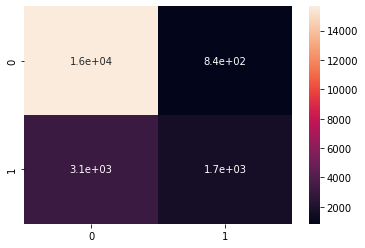

In [97]:
sns.heatmap(confusion_matrix(y_val0, y_pred0),annot=True)

#Logistic Udhar

In [13]:
prf=[]

model = LogisticRegression(max_iter=100,penalty='l2')
model.fit(X_train, y_train) 
predictions = model.predict(X_test)
pp=precision_score(y_test, predictions, average = 'weighted')
rr=recall_score(y_test, predictions, average = 'weighted')
ff=f1_score(y_test, predictions, average = 'weighted')
aa=accuracy_score(y_test, predictions)
temp=[pp,rr,ff,aa]
print(temp)
prf=prf+[temp]
prf=pd.DataFrame(prf)

[0.8267965195284297, 0.8383753107265137, 0.8247564061954583, 0.8383753107265137]


In [115]:
prf=[]

model = LogisticRegression(max_iter=100,penalty='l2')
model.fit(X_train0, y_train0) 
predictions = model.predict(X_test0)
pp=precision_score(y_test0, predictions, average = 'weighted')
rr=recall_score(y_test0, predictions, average = 'weighted')
ff=f1_score(y_test0, predictions, average = 'weighted')
aa=accuracy_score(y_test0, predictions)
temp=[pp,rr,ff,aa]
print(temp)
prf=prf+[temp]
prf=pd.DataFrame(prf)

[0.8255325173299628, 0.8372965620749496, 0.8225344263669317, 0.8372965620749496]


In [116]:
prf=[]

model = LogisticRegression(max_iter=100,penalty='l2')
model.fit(X_train1, y_train1) 
predictions = model.predict(X_test1)
pp=precision_score(y_test1, predictions, average = 'weighted')
rr=recall_score(y_test1, predictions, average = 'weighted')
ff=f1_score(y_test1, predictions, average = 'weighted')
aa=accuracy_score(y_test1, predictions)
temp=[pp,rr,ff,aa]
print(temp)
prf=prf+[temp]
prf=pd.DataFrame(prf)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.7417552118925703, 0.7417550860010278, 0.7417551157344701, 0.7417550860010278]


In [117]:
prf=[]

model = LogisticRegression(max_iter=100,penalty='l2')
model.fit(X_train2, y_train2) 
predictions = model.predict(X_test2)
pp=precision_score(y_test2, predictions, average = 'weighted')
rr=recall_score(y_test2, predictions, average = 'weighted')
ff=f1_score(y_test2, predictions, average = 'weighted')
aa=accuracy_score(y_test2, predictions)
temp=[pp,rr,ff,aa]
print(temp)
prf=prf+[temp]
prf=pd.DataFrame(prf)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.250378003181737, 0.5003778604032526, 0.3337532628140001, 0.5003778604032526]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Decision Trees

In [100]:
mdepth1=[6,7,8,9,10,11,12,13]
gien_list1=[]
best_val1=0
best_model1=0
for dpth in range(len(mdepth1)):
  gini_clf1=DecisionTreeClassifier(criterion='gini',max_depth=mdepth1[dpth],random_state=0)
  gini_clf1=gini_clf1.fit(X_train0,y_train0)
  gini_val1 = gini_clf1.predict(X_val0)
  entr_clf1=DecisionTreeClassifier(criterion='entropy',max_depth=mdepth1[dpth],random_state=0)
  entr_clf1=entr_clf1.fit(X_train0,y_train0)
  entr_val1 = entr_clf1.predict(X_val0)
  gini_vsc1 = precision_score(y_val0, gini_val1, average = 'weighted')
  gini_rcl1 = recall_score(y_val0, gini_val1, average = 'weighted')
  gini_f11 = f1_score(y_val0, gini_val1, average = 'weighted')
  if gini_vsc1>best_val1:
    best_val1=gini_vsc1
    best_model1=gini_clf1
  entr_vsc1 = precision_score(y_val0, entr_val1, average = 'weighted')
  g_rcl1 = recall_score(y_val0, entr_val1, average = 'weighted')
  g_f11 = f1_score(y_val0, entr_val1, average = 'weighted')
  if entr_vsc1>best_val1:
    best_val1=entr_vsc1
    best_model1=entr_clf1
  gien_list1=gien_list1+[[gini_vsc1,gini_rcl1,gini_f11,entr_vsc1,g_rcl1,g_f11]]
gien = pd.DataFrame(gien_list1)
gien.set_axis(['gini precision','gini recall','gini f1', 'entropy precision','entropy recall','entropy f1'], axis='columns', inplace=True)
gien.set_axis([6,7,8,9,10,11,12,13], axis='rows', inplace=True)

<Figure size 1152x432 with 0 Axes>

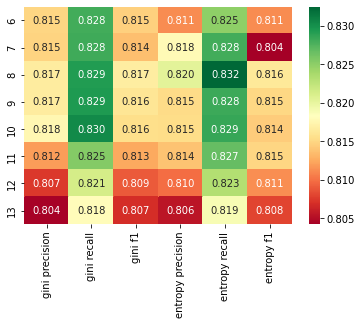

<Figure size 1152x432 with 0 Axes>

In [101]:
sns.heatmap(gien,annot=True,fmt='.3f',cmap='RdYlGn')
plt.figure(figsize=(16,6)) 

In [102]:
best_model1.get_depth()

8

In [77]:
from sklearn import tree
import graphviz
dot_data=tree.export_graphviz(best_model1)
graph = graphviz.Source(dot_data, format="png") 
graph.render(directory='/content/drive/MyDrive/')

'/content/drive/MyDrive/Source.gv.png'

In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val0, best_model1.predict(X_val0))


array([[15664,   826],
       [ 2746,  2086]])

#Random Forests

0.8158041175060792
0.8240315167432699


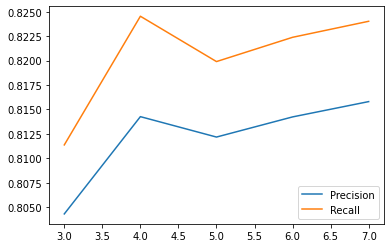

In [118]:
perks=[]
recs=[]
for kkkk in range(5):
  trees=[]
  predictions=[]
  for i in range(100):
    temp_clf = DecisionTreeClassifier(max_depth=3+kkkk,random_state=0)
    temp_fea=(np.random.choice(range(16),8,replace=False))
    X_temp=pd.DataFrame(X_train)
    X_temp.set_axis(range(16), axis='columns', inplace=True)
    tempX=np.array(X_temp.drop(temp_fea, axis = 1),dtype=int)
    temp_X,discard_X,temp_y,discard_y = train_test_split(tempX,y_train,test_size=0.5)
    temp_clf = temp_clf.fit(temp_X,temp_y)
    val_temp=pd.DataFrame(X_val)
    val_temp.set_axis(range(16), axis='columns', inplace=True)
    tempval=np.array(val_temp.drop(temp_fea, axis = 1),dtype=int)
    y_pred=temp_clf.predict(tempval)
    predictions=predictions+[y_pred]
  val_pred=np.zeros(y_val.shape,dtype=float)
  predss=[]
  for i in range(100):
    # print(precision_score(y_val, predictions[i], average = 'weighted'))
    predss=predss+[precision_score(y_val, predictions[i], average = 'weighted')]
    for j in range(y_val.shape[0]):
      val_pred[j]+=(predictions[i][j]/100)
  val_pred=np.round(val_pred)
  perks.append(precision_score(y_val, val_pred, average = 'weighted'))
  recs.append(recall_score(y_val, val_pred, average = 'weighted'))
  pss = np.array(predss)
  pss = pd.DataFrame(pss)
  pss.describe()
sns.lineplot(x = np.arange(3,8), y = perks,label='Precision')
sns.lineplot(x = np.arange(3,8), y = recs,label='Recall')
print(perks[-1])
print(recs[-1])

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.803634069238353
0.7749273051308507


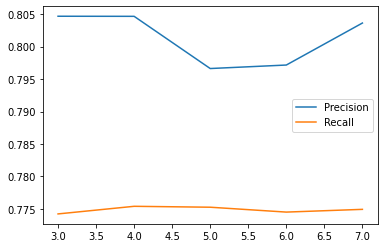

In [122]:
perks=[]
recs=[]
for kkkk in range(5):
  trees=[]
  predictions=[]
  for i in range(100):
    temp_clf = DecisionTreeClassifier(max_depth=3+kkkk,random_state=0)
    temp_fea=(np.random.choice(range(10),8,replace=False))
    X_temp=pd.DataFrame(X_train0)
    X_temp.set_axis(range(10), axis='columns', inplace=True)
    tempX=np.array(X_temp.drop(temp_fea, axis = 1),dtype=int)
    temp_X,discard_X,temp_y,discard_y = train_test_split(tempX,y_train0,test_size=0.5)
    temp_clf = temp_clf.fit(temp_X,temp_y)
    val_temp=pd.DataFrame(X_val0)
    val_temp.set_axis(range(10), axis='columns', inplace=True)
    tempval=np.array(val_temp.drop(temp_fea, axis = 1),dtype=int)
    y_pred=temp_clf.predict(tempval)
    predictions=predictions+[y_pred]
  val_pred=np.zeros(y_val0.shape,dtype=float)
  predss=[]
  for i in range(100):
    # print(precision_score(y_val, predictions[i], average = 'weighted'))
    predss=predss+[precision_score(y_val0, predictions[i], average = 'weighted')]
    for j in range(y_val0.shape[0]):
      val_pred[j]+=(predictions[i][j]/100)
  val_pred=np.round(val_pred)
  perks.append(precision_score(y_val0, val_pred, average = 'weighted'))
  recs.append(recall_score(y_val0, val_pred, average = 'weighted'))
  pss = np.array(predss)
  pss = pd.DataFrame(pss)
  pss.describe()
sns.lineplot(x = np.arange(3,8), y = perks,label='Precision')
sns.lineplot(x = np.arange(3,8), y = recs,label='Recall')
print(perks[-1])
print(recs[-1])

0.6168373071324315
0.5070886611650192


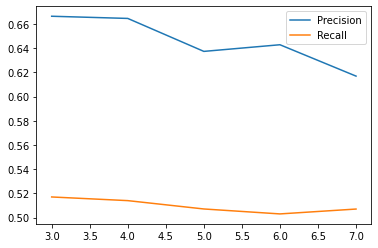

In [124]:
perks=[]
recs=[]
for kkkk in range(5):
  trees=[]
  predictions=[]
  for i in range(100):
    temp_clf = DecisionTreeClassifier(max_depth=3+kkkk,random_state=0)
    temp_fea=(np.random.choice(range(10),8,replace=False))
    X_temp=pd.DataFrame(X_train1)
    X_temp.set_axis(range(10), axis='columns', inplace=True)
    tempX=np.array(X_temp.drop(temp_fea, axis = 1),dtype=int)
    temp_X,discard_X,temp_y,discard_y = train_test_split(tempX,y_train1,test_size=0.5)
    temp_clf = temp_clf.fit(temp_X,temp_y)
    val_temp=pd.DataFrame(X_val1)
    val_temp.set_axis(range(10), axis='columns', inplace=True)
    tempval=np.array(val_temp.drop(temp_fea, axis = 1),dtype=int)
    y_pred=temp_clf.predict(tempval)
    predictions=predictions+[y_pred]
  val_pred=np.zeros(y_val1.shape,dtype=float)
  predss=[]
  for i in range(100):
    # print(precision_score(y_val, predictions[i], average = 'weighted'))
    predss=predss+[precision_score(y_val1, predictions[i], average = 'weighted')]
    for j in range(y_val1.shape[0]):
      val_pred[j]+=(predictions[i][j]/100)
  val_pred=np.round(val_pred)
  perks.append(precision_score(y_val1, val_pred, average = 'weighted'))
  recs.append(recall_score(y_val1, val_pred, average = 'weighted'))
  pss = np.array(predss)
  pss = pd.DataFrame(pss)
  pss.describe()
sns.lineplot(x = np.arange(3,8), y = perks,label='Precision')
sns.lineplot(x = np.arange(3,8), y = recs,label='Recall')
print(perks[-1])
print(recs[-1])

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

0.5567033249714718
0.5500136029745171


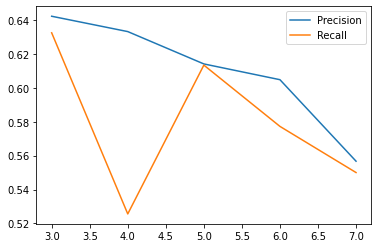

In [126]:
perks=[]
recs=[]
for kkkk in range(5):
  trees=[]
  predictions=[]
  for i in range(100):
    temp_clf = DecisionTreeClassifier(max_depth=3+kkkk,random_state=0)
    temp_fea=(np.random.choice(range(16),8,replace=False))
    X_temp=pd.DataFrame(X_train2)
    X_temp.set_axis(range(16), axis='columns', inplace=True)
    tempX=np.array(X_temp.drop(temp_fea, axis = 1),dtype=int)
    temp_X,discard_X,temp_y,discard_y = train_test_split(tempX,y_train2,test_size=0.5)
    temp_clf = temp_clf.fit(temp_X,temp_y)
    val_temp=pd.DataFrame(X_val2)
    val_temp.set_axis(range(16), axis='columns', inplace=True)
    tempval=np.array(val_temp.drop(temp_fea, axis = 1),dtype=int)
    y_pred=temp_clf.predict(tempval)
    predictions=predictions+[y_pred]
  val_pred=np.zeros(y_val1.shape,dtype=float)
  predss=[]
  for i in range(100):
    # print(precision_score(y_val, predictions[i], average = 'weighted'))
    predss=predss+[precision_score(y_val2, predictions[i], average = 'weighted')]
    for j in range(y_val2.shape[0]):
      val_pred[j]+=(predictions[i][j]/100)
  val_pred=np.round(val_pred)
  perks.append(precision_score(y_val2, val_pred, average = 'weighted'))
  recs.append(recall_score(y_val2, val_pred, average = 'weighted'))
  pss = np.array(predss)
  pss = pd.DataFrame(pss)
  pss.describe()
sns.lineplot(x = np.arange(3,8), y = perks,label='Precision')
sns.lineplot(x = np.arange(3,8), y = recs,label='Recall')
print(perks[-1])
print(recs[-1])

#ADABoost

In [127]:
from sklearn.ensemble import AdaBoostClassifier
dt = DecisionTreeClassifier(max_depth=8,criterion='gini',random_state=0)
lst=[]
mdepth=[5,6,7,8,9,10,11,12]
for i in range(20):
  ada = AdaBoostClassifier(base_estimator=dt,n_estimators=mdepth[i])
  ada.fit(X_train,y_train)
  y_vp = ada.predict(X_val)
  vsc = precision_score(y_val, y_vp, average = 'weighted') 
  rcl = recall_score(y_val, y_vp, average = 'weighted')
  f1 = f1_score(y_val, y_vp, average = 'weighted')
  lst=lst+[[vsc,rcl,f1]]
lst=pd.DataFrame(lst)
lst.set_axis([ 'precision','recall','f1'], axis='columns', inplace=True)
lst.set_axis([5,6,7,8,9,10,11,12], axis='rows', inplace=True)

In [99]:
sns.heatmap(lst,annot=True,fmt='.3f',cmap='RdYlGn')

plt.figure(figsize=(16,6)) 

NameError: ignored

# xGBoost


In [ ]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [25]:
import xgboost as xgb
model_xg = xgb.XGBClassifier(objective="binary:logistic")
model_xg.fit(X_train,y_train)
y_pred = model_xg.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[15778   791]
 [ 2437  2315]]


In [27]:
import xgboost as xgb
model_xg = xgb.XGBClassifier(objective="binary:logistic")
model_xg.fit(np.array(X_train1),y_train1)
y_pred1 = model_xg.predict(X_test1)
print(confusion_matrix(y_test1,y_pred1))

[[10063  6490]
 [ 4219 12309]]


In [105]:
import xgboost as xgb
model_xg = xgb.XGBClassifier(objective="binary:logistic")
model_xg.fit(np.array(X_train0),y_train0)
y_pred0 = model_xg.predict(X_test0)
print(confusion_matrix(y_test0,y_pred0))

[[15767   802]
 [ 2495  2257]]


#K Nearest?

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
for i in range(1,10):
  model=KNeighborsClassifier(i)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(i,precision_score(y_test,y_pred))
  print(i,recall_score(y_test,y_pred))
  print(i,accuracy_score(y_test,y_pred))

1 0.5506568692941438
1 0.5204124579124579
1 0.7984616106186389
2 0.7170231729055259
2 0.3385942760942761
2 0.8228038084517612
3 0.6436441816715937
3 0.5039983164983165
3 0.8272595094038742
4 0.7441860465116279
4 0.40404040404040403
4 0.8362178134233854
5 0.684286124676817
5 0.5012626262626263
5 0.8372965620749496
6 0.745031871016123
6 0.41813973063973064
6 0.8384222128417992
7 0.7043609022556391
7 0.49284511784511786
7 0.8408611228366399
8 0.7567964731814842
8 0.4335016835016835
8 0.8426903053327706
9 0.7263853904282116
9 0.48547979797979796
9 0.8445663899441865


In [24]:
for i in range(1,10):
  model=KNeighborsClassifier(i)
  model.fit(X_train1,y_train1)
  y_pred1=model.predict(X_test1)
  print(i,precision_score(y_test1,y_pred1))
  print(i,recall_score(y_test1,y_pred1))
  print(i,accuracy_score(y_test1,y_pred1))

1 0.6269643541586815
1 0.7917473378509197
1 0.6605906713823645
2 0.6364682917062916
2 0.7693610842207164
2 0.6652156827181765
3 0.6121341593676565
3 0.8668320425943853
3 0.6590490009370938
4 0.6312505692686037
4 0.8386374636979671
4 0.6746168495511018
5 0.6117386211512718
5 0.8847410454985479
5 0.6618602823372933
6 0.6281300884566299
6 0.8635648596321394
6 0.6764003506544543
7 0.6138346489405899
7 0.8939375605033882
7 0.6660318611892022
8 0.6263201000043105
8 0.8791142303969022
8 0.6775490462803422
9 0.6146788990825688
9 0.9039811229428848
9 0.6689036002539221


In [106]:
for i in range(1,10):
  model=KNeighborsClassifier(i)
  model.fit(X_train0,y_train0)
  y_pred0=model.predict(X_test0)
  print(i,precision_score(y_test0,y_pred0))
  print(i,recall_score(y_test0,y_pred0))
  print(i,accuracy_score(y_test0,y_pred0))

1 0.5296803652968036
1 0.4882154882154882
1 0.7893156981379861
2 0.6923828125
2 0.2984006734006734
2 0.8140800150086769
3 0.6253561253561254
3 0.46191077441077444
3 0.8183950096149336
4 0.7260926006057984
4 0.3531144781144781
4 0.8261338586370245
5 0.6787822305063684
5 0.45980639730639733
5 0.8311054828572768
6 0.7530195751770096
6 0.38047138047138046
6 0.8341072182355425
7 0.7132426153335546
7 0.4522306397306397
7 0.8373903663055203
8 0.7570667759115117
8 0.3888888888888889
8 0.8359833028469584
9 0.7264986376021798
9 0.44886363636363635
9 0.8395009614933634


In [107]:
print(confusion_matrix(y_test0,y_pred0))

[[15766   803]
 [ 2619  2133]]


In [109]:
print(confusion_matrix(y_test0,y_pred0))

[[15766   803]
 [ 2619  2133]]


#REg

In [128]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor

In [130]:
lr = LinearRegression()
lr = lr.fit(X_train, y_train)

In [133]:
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))

0.2950278245070608
0.2917814710829689


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   13.0s finished
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:2142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if v not in values:


ValueError: ignored

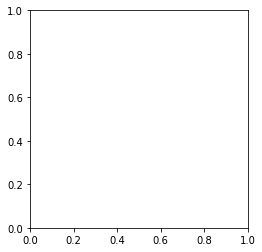

In [140]:
lr = DecisionTreeRegressor()
train_scores, test_scores = validation_curve(lr, X_train, y_train, param_name = 'max_depth', param_range=np.arange(1,11), cv=3, verbose = 1, scoring = 'r2' )
plt.imshow(train_scores, test_scores)

In [136]:
rfr = RandomForestRegressor(n_estimators = 50, max_depth = 17, max_features = 'sqrt', verbose = 1, n_jobs = -1)
rfr = rfr.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.7s finished


In [138]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test, y_test))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    1.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


0.7466643110399491
0.38946180622970505


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.4s finished
